# Examen intermédiaire 2021

Julien (Marie F) Ars (314 545) - 7 juin 2021

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.ticker import (MaxNLocator, MultipleLocator, AutoMinorLocator)

## Données générales

Un canal en béton armé transporte de l’eau avec un débit $Q = 100 L/s$.
Il a une pente de $i = 1\%$. Il a une section rectangulaire de hauteur $1 m$ et
de largeur $W = 50 cm$. En un point $A$ – ici de coordonnées $(0, 0)$ dans le
repère $Axy$ de la figure 1 – il y a un ouvrage-fente (slit dam) : il s’agit d’un
mur droit qui occupe toute la largeur du canal. Une fente le parcourt sur
toute sa hauteur ; elle a une largeur $b = 10cm$ et elle est centrée par rapport à l’axe
du canal (voir figure 1). Au pied de la fente (côté aval), il y a une marche
verticale de pelle $p$. Le canal continue avec la même pente. Le coefficient de
Manning-Strickler du béton est $K = 55 m^{1/3}/s$.

In [2]:
#Encodage des données en python
Q = 100e-3 #conversion L/s en m³/s
i=1e-2 #1%
W=50e-2 #conversion cm en m
K = 55 #m^(1/3)/s
b= 10e-2 #m
g = 9.81 #m / s^2
rho = 1e3 #kg / m^3

L’eau arrive par la droite sur la figure 1(a). Compte tenu de la pente,
on suppose en première approximation que le régime est supercritique dans
la partie amont du bief. Le passage de la fente conduit à un ralentissement
significatif de l’écoulement. Le régime est attendu être subcritique à l’amont
immédiat de la fente. De ce fait, on suppose qu’il se forme un ressaut hydraulique noté $BC$ sur la figure 1. Compte tenu du fort rétrécissement et de
la marche, l’écoulement est supposé devenir critique au point A. (Par commodité de notation, on pourra appeler $A’$ le point $A$ quand il est dans la
fente de largeur $b$, et garder la notation A quand il est du côté du canal avec
une largeur $W$). En résumé, une analyse simplifiée conduit à considérer qu’en
première approximation, lorsque l’on va de l’amont vers l’aval (de la droite
vers la gauche sur la figure 1(a)), on a un écoulement permanent uniforme
entre $D$ et $C$, puis un ressaut entre $C$ et $B$, et enfin une zone d’écoulement
subcritique avec une surface libre horizontale.


<img src="figure 1.png" alt="Drawing" style="width: 600px;"/>


## Problème 1 :

On s’intéresse au comportement hydraulique de l’ouvrage. Dans un
premier temps (pour tout ce problème), on néglige les effets des parois
latérales, et on suppose donc que le rayon hydraulique $R_h$ varie comme
la hauteur d’eau $h$ dans le canal. On néglige les pertes de charge au
passage de la fente.

***

**(1)** Si l’écoulement est critique au passage de la fente (en $A'$), montrer que la charge spécifique en $A'$ : $$H_S = \frac{3}{2} * \sqrt[3]{\frac{Q^2}{gb^2}}$$

**Réponse :**

Si l'écoulement est critique en $A'$, on a que $Fr = 1$. Ce qui donne : $$\frac{u}{\sqrt{gh}} = 1 \Rightarrow h = \frac{u^2}{g}$$
Par ailleurs, on a que $u = \frac{Q}{S}$, avec $S = bh = b\frac{u^2}{g}$. On en déduit : $$u=\frac{Qg}{bu^2} \Rightarrow u^3 = \frac{Qg}{b}$$

Il en ressort que la Hauteur Spécifique, $H_S = h + \frac{u^2}{2g}$ vaut en $A'$ : $$H_{S,A'} = h + \frac{u^2}{2g} = \frac{3}{2}\frac{u^2}{g} = \frac{3}{2g} \left ( \frac{Q^2g^2}{b^2} \right )^{3/2} = \frac{3}{2} \sqrt[3]{\frac{Q^2}{b^2g}}$$

***
**(2)**  Calculer la hauteur normale dans le bief amont (on suppose que
$h_n = h_C = h_D$) avec l’hypothèse d’un canal infiniment large.

**Réponse :**

Dans le cas d'un canal infiniment large, on peut appliquer la formule : $$h_n = \left ( \frac{q}{K\sqrt{i}} \right )^{3/5}$$

Ce qui donne dans notre cas, avec $q = \frac{Q}{W}$ : $$h_{n, amont} = \left ( \frac{Q}{WK\sqrt{i}} \right )^{3/5}$$

*Application numérique :*

In [3]:
h_n_amont = (Q/(W*K*i**0.5))**0.6
print(f"Hauteur normale en amont : {h_n_amont*100:.1f} cm")

Hauteur normale en amont : 14 cm


***
**(3)** Calculer la hauteur du ressaut $h_B$ en $B$ (qui est la hauteur conjuguée de $h_C$)

**Réponse :**

On décide d'appliquer la formule suivante : $$\frac{h_B}{h_{amont}} = \frac{1}{2} \left ( \sqrt{1+ 8Fr_1^2}-1 \right ) $$

En effet, les conditions sont réunies pour qu'elle soit applicable :
* le fond est peu rugueux et de pente négligeable
* l'écoulement est permanent (avec $q=Q/W$), unidirectionnel
* Le ressaut est immobile
* La pression est hydrostatique loin du ressaut
* Le profil de vitesse est uniforme
* L'effet des parois est négligé (on néglige le frottement $\tau_p$)

On a donc ($h_{amont} = h_{n, amont}$ car l'écoulement y est permanent uniforme): $$h_B = \frac{h_{n,amont}}{2} \left ( \sqrt{1+ 8Fr_1^2}-1 \right ) $$

Le nombre de Froude se calcule avec la formule suivante : $$Fr_1 = \frac{u}{\sqrt{gh}} = \frac{q}{\sqrt{gh_{amont}^3}}$$

*Application numérique :*

In [4]:
q= Q/W
Fr_1 = q / (g * h_n_amont**3)**0.5
h_B = h_n_amont / 2 * ((1+8*Fr_1**2)**0.5 - 1)
print(f"Fr_1 = {Fr_1:.2f} et h_B = {h_B*100:.1f} cm")

Fr_1 = 1.3 et h_B = 19 cm


***
**(4)** Calculer la hauteur d’eau juste en amont de la fente (au point A, avant le passage à la hauteur critique)

**Réponse :**

Etant donné que les pertes de charges au niveau de la fente sont négligées dans cet exo, nous avons que la charge totale est constante entre $A$ (juste avant la fente) et $A'$ (dans la fente). Considérant que ces deux points se trouvent à la même altitude $z$, nous avons une charge spécifique constante : $$H_{S, A} = H_{S, A'}$$ 

Nous avons montré en **(1)** que $H_{S,A'} = \frac{3}{2} * \sqrt[3]{\frac{Q^2}{gb^2}}$.

Pour le point $A$, nous avons : $$H_{S, A} = h_A + \frac{u_A^2}{2g}$$

Avec $u_A = \frac{Q}{Wh_A}$ : $$h_A = H_{S, A'} - \frac{Q^2}{2gW^2h_A^2} = \frac{3}{2} * \sqrt[3]{\frac{Q^2}{gb^2}} - \frac{Q^2}{2gW^2h_A^2}$$

Nous résolvons cela par itération (*Application numérique*) :

In [169]:
h_A = h_n_amont
diff = 10
while diff >1e-5:
    prev = h_A
    h_A = 3/2 * (Q**2/g/b**2)**(1/3) - Q**2 / (2*g*W**2*h_A**2)
    diff = np.abs(prev-h_A)
print(f"Hauteur en A (juste en amont de la fente) : {h_A*100:.1f} cm")

Hauteur en A (juste en amont de la fente) : 69.7 cm


***
**(5)** Tracer les courbes de charge spécifique $H_s(h)$ pour l’écoulement
dans le canal et celle à travers la fente. Positionner les points A, B, C,
et D. En déduire la position du ressaut. 

**Réponse :**

Avec $H_* = \frac{H_S}{h_c}$ et $\xi = \frac{h}{h_c}$, nous savons que (résultat du cours): $$H_* = \xi + \frac{1}{2\xi^2}$$

De plus, nous avons $h_c = \left [ h \right ]_{Fr = 1} = \sqrt[3]{\frac{q^2}{g}}$ (section rectangulaire, voir question **(1)** pour détail des calculs), et donc : $$ h_{c, canal} = \sqrt[3]{\frac{Q^2}{W^2g}} $$ $$ h_{c, fente} = \sqrt[3]{\frac{Q^2}{b^2g}}$$

*Application numérique :*

In [6]:
#Calcul des hauteurs critiques
h_c_canal = (Q**2 / W**2 / g)**(1/3)
h_c_fente = (Q**2 / b**2 / g)**(1/3)
print(f"Hauteurs critiques : \nCanal : {h_c_canal*100:.1f} cm \t Fente : {h_c_fente*100:.1f} cm")

Hauteurs critiques : 
Canal : 16 cm 	 Fente : 47 cm


*Graphiques :*

<ipython-input-8-09f6dd9cbbef>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot)


Point A : 	h: 70 cm, Charge spécifique H_S : 70 cm
Point B : 	h: 19 cm, Charge spécifique H_S : 24 cm
Point C et D : 	h: 14 cm, Charge spécifique H_S : 25 cm

Point A' (hauteur critique) : 	h: 47 cm, Charge spécifique H_S : 70 cm



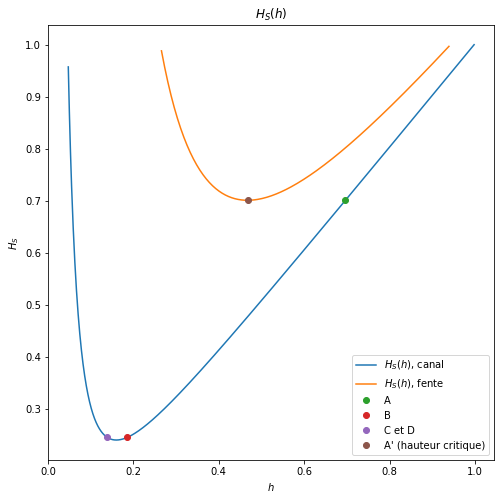

In [9]:
plt.figure(figsize = (8,8))

# Courbes
plot_h_S(h_c_canal, "canal",  subplot = 111)
plot_h_S(h_c_fente, "fente", subplot = 111)

# Points
h_C = h_n_amont
h_D = h_n_amont
plot_points([h_A, h_B, h_C], ["A", "B", "C et D"], h_c_canal)
plot_points([h_c_fente], ["A' (hauteur critique)"], h_c_fente)

plt.show()

Pour obtenir la position du ressaut, nous allons utiliser le fait que la surface libre est horizontale entre B et A

Cela donne : $$z_A + h_A = z_B + h_b$$

Ainsi, $$\Delta_{_{AB}} z = z_B - z_A = h_A - h_B$$

On utilise ensuite la pente $i$ du fond pour en déduire la position du ressaut $x_{ressaut}$ : $$x_{ressaut} = i^{-1} * \Delta_{_{AB}} z = i^{-1} * \left ( h_A - h_B \right )$$

*Application numérique :*

In [10]:
x_ressaut = i**-1 * (h_A - h_B)
print(f"Position du ressaut : \t x = {x_ressaut:.1f} m")

Position du ressaut : 	 x = 51 m


***

**(6)** Est-ce qu’il existe un débit minimal au-dessous duquel aucun
ressaut ne se forme ?

Pour pouvoir visualiser plus facilement le problème, nous réprésentons la courbe du niveau d'eau en fonction de x :

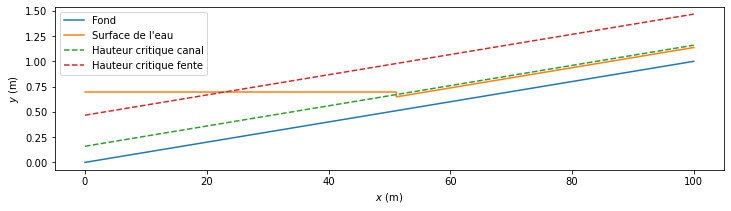

In [11]:
draw_h(figsize = (12,3))

On observe que pour éviter un ressaut, il faudrait que $h(x)$ ne dépasse pas la hauteur critique du canal. Or, la hauteur d'eau au point A dépend de la condition au point $A'$

***
***

## Problème 2 :

**(1)** En vous inspirant de ce qui a été fait en cours pour le seuil mince, montrer qu’en l’absence de pertes de charge, le débit à travers la fente est :

$$Q = \left ( \frac{2}{3} h_A \right )^{3/2} b \sqrt{g}$$

**Réponse :**

Nous avons montré dans le problème 1 que :$$H_{S, A'} = \frac{3}{2} * \sqrt[3]{\frac{Q^2}{gb^2}}$$ 

En l'absence de pertes de charge, nous avons : $$H_A = H_{A'} = H_{S, A'} + z_{A'}$$

Avec $z_{A'} = 0$, nous découlons des deux premières équations : $$ Q = \left ( \frac{2}{3} H_A \right )^{3/2} b \sqrt{g}$$

Par définition, on a : $$ H_A = h_A + \frac{u_A^2}{2g} $$

La présence de la fente va ralentir l'eau, au point que $u_A \ll h_A$. On  a alors : $$H_A \approx h_A$$

On en conclut :
$$ Q = \left ( \frac{2}{3} h_A \right )^{3/2} b \sqrt{g}$$

***

**(2)** Pour prendre en compte les pertes de charge, on introduit un
coefficient de débit $C_d$ tel que : 

$$ Q = \frac{2}{3} C_d \sqrt{2g} b h_A^{3/2}$$

Faire une analyse dimensionnelle et établir la dépendance de $C_d$ vis-à-vis des groupes adimensionnels importants du problème.

**Réponse :**

On note $L$ les unités de longueur, $M$ les unités de masse, $T$ les unités de temps.

On décompose les variables :
$$Q \rightarrow L^3 T^{-1}$$
$$g \rightarrow L^2 T^{-2}$$
$$b \rightarrow L$$
$$h_A \rightarrow L$$
$C_d$ étant adimensionel.

Soit $$\Phi(\pi_1,\pi_2) = Q^\alpha g^\beta b^\gamma h_A^\delta \rightarrow L^{3\alpha + 2\beta + \gamma + \delta} * M^{0} * T^{-\alpha - 2 \beta}$$

On a donc comme équations : $$3\alpha + 2\beta + \gamma + \delta = 0$$
$$\alpha + 2\beta = 0$$

On cherche 2 groupes adimentionnels satisfant ces deux équations. On prend :
$$\pi_1 = \left \{ \begin{array} \\
      \alpha = 1 \\
      \beta = -1/2 \\
      \gamma =-1/2 \\
      \delta = -3/2
    \end{array} \right \} = \frac{Q}{b\sqrt{gh_A^3}} = Fr$$
$$\pi_2 = \left \{ \begin{array} \\
      \alpha = 0\\
      \beta = 0\\
      \gamma = -1\\
      \delta = 1
    \end{array} \right \} = \frac{h_A}{b}$$

Observons que $C_d$ s'exprime comme :
$$ C_d = \frac{3}{2^{3/2}} Q g^{-1/2} b^{-1} h_A^{-3/2} = \frac{3}{2^{3/2}} Fr$$

**Suite de l'énoncé :** Une étude expérimentale montre que $$C_d = 0,562 + \frac{10}{Re^{0,45}}$$ Où $Re =\frac{\sqrt{2gh}b}{\nu}$ est le nombre de Reynolds, et $\nu = 10^{−6} m^2 $ la viscosité cinématique de l’eau. En déduire le hauteur d’eau $h_A$ juste à l’amont de la fente.

**Réponse :**

On obtient alors:
$$
C_d = 0,562 + \frac{10}{Re^{0,45}} = 0,562 + 10 * \left ( \frac{\nu}{\sqrt{2gh_A}b} \right )^{0,45}$$

Il faudra donc calculer $h_A$ par itération :

$$h_A = \left ( \frac{3}{2} \frac{Q}{C_d b \sqrt{2g}} \right )^{2/3}$$

*Application Numérique :*

In [15]:
nu = 1e-6 #m²

diff = 10
h_A_2 = 1
while diff>1e-5:
    prev = h_A
    
    Cd = 0.562 + 10*(nu /(2*g*h_A_2)**0.5 /b)**0.45
    h_A_2 = (3/2 * Q / Cd /b /(2*g)**0.5)**(2/3)
    
    diff = np.abs(prev - h_A_2)
    
print(f"Hauteur en A: {h_A_2*100:.1f} cm")

Hauteur en A: 68.8 cm


In [16]:
print(f"Cd : {Cd:.3f}")

Cd : 0.593


***

**(3)** Calculer les hauteurs normale et critique le long du bief CD
en prenant en compte les parois latérales du canal. Dans quel régime
d’écoulement est-on ?

**Réponse :**

Pour la hauteur critique, on peut réutiliser la valeur du problème 1. En effet, les parois latérales ne l'influencent pas.

In [17]:
print(f"Hauteur critique CD : {h_c_canal*100:.1f} cm")

Hauteur critique CD : 16.0 cm


Si l'on prend en compte les parois latérales, on ne peut plus approximer $R_H \approx h$. On obtient pour le périmètre et la surface mouillés :

$$ \chi = \left ( W + 2h_n \right ) \text{ et } S = W * h_n $$

Ce qui donne $$R_H = \frac{S}{\chi} = \frac{W*h_n}{\left ( W + 2h_n \right )}$$

On obtient alors comme équation pour la hauteur normale : 
$$
Q = K*R_H^{2/3}*\sqrt{i}*S = K * W^{5/3} * \sqrt{i} * \frac{h_n^{5/3}}{\left (  2h_n + W \right )^{2/3} }
$$

Que l'on peut réécrire comme :
$$
\left ( 2h_n + W \right )^{2/3} * Q = K * W^{5/3} * \sqrt{i} * h_n^{5/3}
$$

On a finalement :
$$
h_n = \left [ \frac{Q}{KW^{5/3}\sqrt{i}} \left ( 2h_n + W \right )^{2/3} \right ]^{3/5}
$$

*Application Numérique :*

In [18]:
h_n_2 = 5
diff = 10

while diff > 1e-5:
    prev = h_n_2
    
    #h_n = 1/2 * K**1.5 * W**2.5 * i**0.75 * h_n**2.5 / Q**1.5 - W / 2
    h_n_2 = (Q /K /W**(5/3) /i**0.5 * (2*h_n_2 + W)**(2/3))**(3/5)
    
    diff = np.abs(prev-h_n_2)
    
print(f"Hauteur normale sur CD : {h_n_2*100:.1f} cm")

Hauteur normale sur CD : 16.8 cm


***

**(4)**  Calculer la hauteur d’eau du ressaut $h_B$

**Réponse :**

Observons que la hauteur normale est plus grande que la hauteur critique. Nous sommes donc déjà en régime subcritique, il n'y a pas lieu d'avoir un ressaut. En effet, $$Fr = \frac{u}{\sqrt{gh}} < 1$$

In [21]:
q= Q/W
Fr_2 = q / (g * h_n_2**3)**0.5
h_B_2 = h_n_2
print(f"Fr = {Fr_2:.2f} et h_B = {h_B_2*100:.1f} cm")

Fr = 0.93 et h_B = 16.8 cm


***

**(5) et (6)**  Résoudre numériquement l’équation de la courbe de remous dans le canal et la tracer. Comparer avec celle idéalisée au
problème 1.

**Résolution :**

L'équation de la courbe de remous est la suivante : $$ \frac{\mathrm{d}h_n}{\mathrm{d}x} = i * \frac{1- \left ( \frac{h_n}{h} \right )^{10/3}}{1- \left ( \frac{h_c}{h} \right )^{3}} $$

*Résolution numérique (en python) :*

In [68]:
def eq(h, x):
    return - i * (1-(h_n_2/h)**(10/3)) / (1-(h_c_canal/h)**(3))

x = np.linspace(0,80,10000)

h2 = odeint(eq, [h_A_2], x).flatten() 

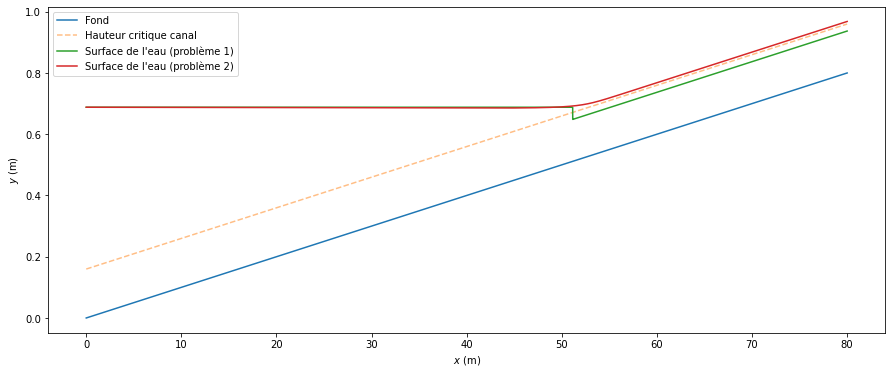

In [69]:
draw_h2(x, h2, figsize = (15, 6))

***
***

## Problème 3 : Forces qui s'exercent sur la fente

**Question (1)** Calculer la pression hydrostatique sur chacune des deux ailes de la fente en supposant que la hauteur d’eau est uniforme le long de la section et vaut $h_A$. Faire l’application numérique.



**Réponse :**

La pression hydrostatique en un point vaut $p_h = \rho * g *h$, avec $h$ la profondeur de ce point. En intégrant sur la surface des deux ailes de la fente, on a :
$$
P_h = \int_0^{W-b} \int_0^{h_A} \rho *g *h \ dh \ dx = \frac{1}{2} * \rho * g * h_A^2 * \left ( W - b \right )
$$

In [33]:
P_h_A = rho * g * h_A**2 * (W-b)/2
print(f"Pression hydrostatique en A : P_h = {P_h_A:.0f} N")

Pression hydrostatique en A : P_h = 929 N


*** 

**Question (2)** Considérer un volume de contrôle entre A et B. On suppose
que la hauteur et la vitesse moyenne sont uniformément constantes
pour la section en B. Au point A, la vitesse varie fortement au passage
de la fente. On a fait des mesures de la composante $u$ selon **~x~ z** de la
vitesse près de la fente. Les données sont accessibles à partir du fichier
`profil_vitesse_z.txt`. Tracer le profil de vitesse $u$ pour les sections
A et B.

**Réponse (Python) :**

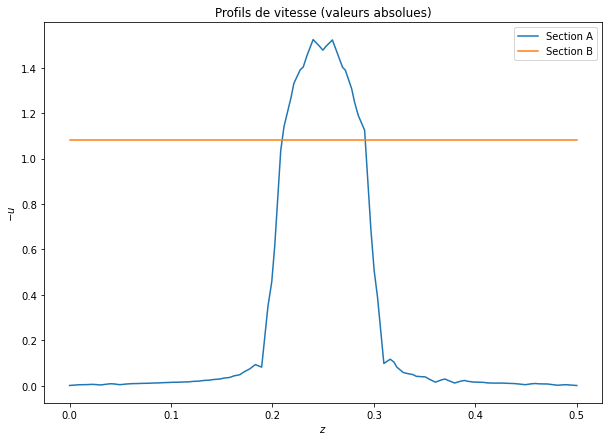

In [34]:
profil_vitesse = np.loadtxt("profil_vitesse_z.txt")

z = profil_vitesse[:,0]
u_x_a = profil_vitesse[:,1]
u_B = -Q/W/h_B
u_x_b = np.full_like(profil_vitesse[:,1], u_B)

plt.figure(figsize = (10,7))
plt.plot(z, -u_x_a, label = "Section A")
plt.plot(z, -u_x_b, label = "Section B")
plt.xlabel("$z$")
plt.ylabel("$-u$")
plt.title("Profils de vitesse (valeurs absolues)")
plt.legend()
plt.show()

***

**Question (3)** Écrire le théorème de conservation de la quantité de mouvement
sous forme intégrale en régime permanent et considérer sa projection
sur l’axe Ax. Dans un premier temps, on négligera le frottement sur les
parois.

**Réponse :**

*Théorème de la conservation de la quantité de mouvement :*
$$
\frac{\mathrm{d}}{\mathrm{d} t} \int_{V} \varrho \boldsymbol{u} \mathrm{d} V+\int_{S} \varrho \boldsymbol{u}(\boldsymbol{u} \cdot \boldsymbol{n}) \mathrm{d} S=\varrho V \boldsymbol{g}+\int_{S} \boldsymbol{\sigma} \cdot \boldsymbol{n} \mathrm{d} S
$$

On projete le théorème sur x:

$$
\frac{\mathrm{d}}{\mathrm{d} t} \int_{V} \rho u_x \mathrm{d} V - \int_{S_A} \rho u_{x,A}^2 \mathrm{d}s + \int_{S_B} \rho u_{x,B}^2 \mathrm{d}s = 0 + P_{h, A} - P_{h, B} - F_{M}
$$ Avec :
- $P_{h, A}$ et $P_{h, B}$ les résultantes des pressions hydrostatique sur les sections respectivement en A et en B.
- $F_M$ la composante motrice du poids.

Comme l'écoulement est permanent, nous avons :
 $$ \frac{\mathrm{d}}{\mathrm{d} t} \int_{V} \rho u_x \mathrm{d} V = 0 $$
 
Et donc :
$$
-\int_{S_A} \rho u_{x,A}^2 \mathrm{d}s + \int_{S_B} \rho u_{x,B}^2 \mathrm{d}s = P_{h, A} - P_{h, B} - F_{M}
$$

***

**Question (4)**  Exprimer la force de pression et le flux de quantité de mouvement
pour la section B. Faire l’application numérique. Faire la même chose
pour la section passant par A.

**Réponse :**

- Force de pression en B : $$P_{h, B} = W * \rho * g * \frac{h_B^2}{2}$$
- Résultante du flux de quantité de mouvement en B : $$\mathscr{F}_B = \int_{S_B} \rho u_{x,B}^2 \mathrm{d}s = \left ( W * h_B \right ) * \rho * u_B^2$$ ($u$ est considéré uniforme en B)
- Force de pression en A : (Voir **(1)**)$$P_{h, A} = (W-b) * \rho * g * \frac{h_B^2}{2}$$ 
- Résultante du flux de quantité de mouvement en A :  $$\mathscr{F}_A = \int_{S_A} \rho u_{x,A}^2 \mathrm{d}s = h_A * \rho * \int_0^W u_{x, A}^2 \mathrm{d}z$$ (on considère $u$ uniforme selon y)

In [170]:
P_h_B = W * rho *g * h_B**2 /2
print(f"Pression hydrostatique en B : {P_h_B:.1f} N")
Flux_B = W * h_B * rho * u_B**2
print(f"Flux en B (Résultante) : {Flux_B:.0f} N")
# On a déjà P_h_A
print(f"Pression hydrostatique en A : {P_h_A:.0f} N")
Flux_A = h_A * rho * np.trapz(u_x_a**2, z)
print(f"Flux en A (Résultante) : {Flux_A:.0f} N")

Pression hydrostatique en B : 84.0 N
Flux en B (Résultante) : 108 N
Pression hydrostatique en A : 929 N
Flux en A (Résultante) : 119 N


***

**Question (5)** : Estimer la composante motrice du poids. Comparer la résultante
des forces (pression + flux de quantité de mouvement + force motrice).
Est-ce que les écarts peuvent s’expliquer par le frottement sur les parois
(que l’on a négligé) ?

**Réponse :**

On estime la composante motrice du poids comme étant la partie horizontale de la réaction du sol. On obtient : $$F_M = i*P = i* V * \rho *g = i * g * \rho * W* \frac{(h_A + h_B) * x_B}{2}$$

*Application numérique :*

In [171]:
F_M = i*g*rho*W*(h_A + h_B)*x_ressaut / 2
print(f"Composante motrice du poids : {F_M * 1e-3:.2f} kN")

Composante motrice du poids : 1.11 kN


La résultante des forces vaut :
$$
R_f =  P_{h,A} - F_M - P_{h, B} 
$$

Or, pour expliquer les changements de la quantité de mouvement, il faudrait une force de:
$$
R_{p} = -\mathscr{F}_A +\mathscr{F}_B 
$$

*Application numérique :*

In [172]:
R = P_h_A -F_M - P_h_B
R_p = Flux_B - Flux_A
print(f"Résultante des forces : {R:.0f} N")
print(f"Résultante des flux : {R_p:.1f} N")
print(f"Différence (valeur absolue) : {np.abs(R-R_p):.0f} N")

Résultante des forces : -261 N
Résultante des flux : -10.8 N
Différence (valeur absolue) : 250 N


Oui, l'écart peut s'expliquer par les forces de frottement, en première approximation.

***

**Question (6)** Le profil de hauteur mesurée expérimentalement le long de Ax
est disponible à partir du fichier ```profil_hauteur_x.txt``` ; on dispose
aussi du profil de hauteur le long de l’ouvrage-fente selon z (il faut se reporter au fichier ```profil_hauteur_z.txt```). Tracer les profils de hauteur
expérimental et théorique pour les directions x et z. Que pensez-vous
de l’accord entre théorie et expérience ?

**Réponse :**

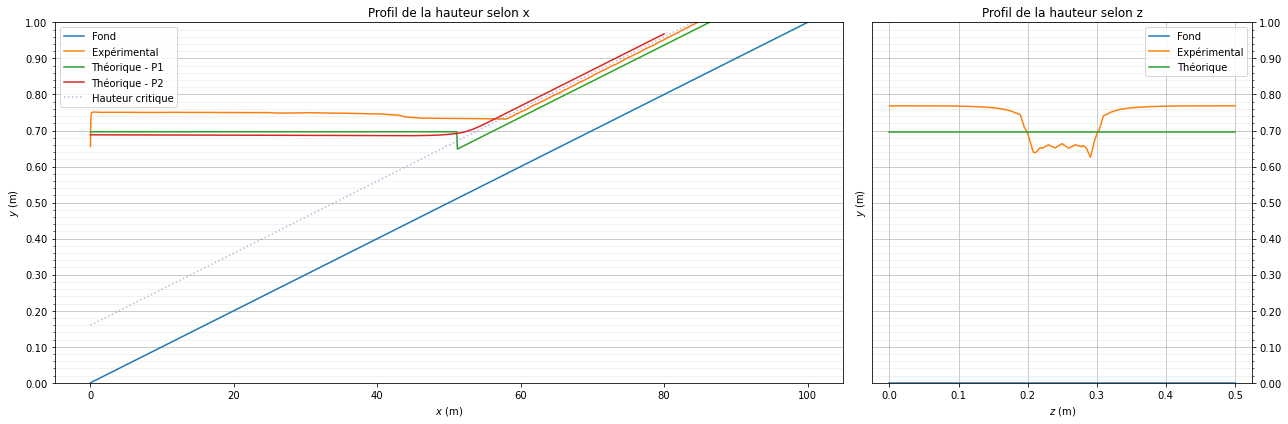

In [173]:
draw_h3()

Sur le profil selon x, on observe une certaine différence. En effet, la hauteur sur le tronçon AB est plus haute que prévu. De plus, on observe que la hauteur d'eau sur le tronçon CD est bien en dessous de la hauteur critique, comme dans le problème 1. Le ressaut par contre est moins marqué (voire inexistant). Peut-être cela est-ce dû à une mauvaise estimation des forces de frottement. Sur ce profil, la théorie était donc assez mauvaise pour prédire la réalité.

Sur le profil selon z, on observe que la hauteur calculée théoriquement ($h_A$) correspond à la moyenne de la hauteur sur cette portion. Mais on peut estimer qu'il y a ici une certaine adéquation entre la théorie et l'expérience.

***

**Question (7)** Faire une estimation du terme de frottement. On pourra donner les bornes attendues de variation en considérant que le frottement s’exerce uniquement sur le fond (hypothèse d’un canal infiniment large) ou bien sur tout le périmètre mouillé (fond + parois latérales). On négligera les pertes de charge singulière au passage de la fente.


**Réponse :**

On prend la loi de Manning-Strickler pour estimer le terme de frottement :
$$
    \tau_{p}= \frac{\rho g}{K^{2}} \frac{\bar{u}^{2}}{R_{H}^{1 / 3}}
$$

## Annexe : Fichier helpers.py

In [167]:
# helpers.py
# Fonctions pour l'examen intermédiaire 2021 de mécanique des Fluides pour GC
# Par Julien Marie F Ars

import numpy as np
import matplotlib.pyplot as plt


## Problème 1, ex 5

def H_star(x):
    return x + 1/(2*x**2)
        
def get_H_S(h, h_c):
    return h_c * H_star(h/h_c)

def plot_h_S(h_c, name = "", limits = (1,1), subplot = 111) :
    xi = np.linspace(0,8,1000)[1:]
    filter = np.bitwise_and(xi*h_c < limits[0], H_star(xi)*h_c < limits[1])
    
    plt.subplot(subplot)
    plt.plot(xi[filter]*h_c, H_star(xi)[filter] * h_c, label=f"$H_S(h)$, {name}")
    
    plt.xlabel("$h$")
    plt.ylabel("$H_S$")
    plt.title(f"$H_S(h)$")

def plot_points(h, labels, h_c):
    h = np.array(h)
    H_S = get_H_S(h, h_c)
    print("".join([f"Point {name} : \th: {h*100:.0f} cm, Charge spécifique H_S : {H_S*100:.0f} cm\n" for name, h, H_S in zip(labels, h, H_S)]))
    
    ax = plt.gca()
    [ax.plot(h, H_S, "o", label=name) for name, h, H_S in zip(labels, h, H_S)]
    ax.legend()
    
# Problème 1, ex 6
def h1(x):
    h_AB = h_A - i*x
    h_CD = h_n_amont
    try : #if numpy
        len(x)
        h = np.zeros_like(x)
        h[x<x_ressaut] = h_AB[x<x_ressaut]
        h[x>=x_ressaut] = h_CD
    except: #if not numpy
        if x<x_ressaut:
            h = h_AB
        else:
            h = h_CD
    return h

def draw_h(h = h1, figsize = (10, 5)):
    x = np.linspace(0,100, 10000)
    
    plt.figure(figsize = figsize)
    plt.plot(x, x*i, label = "Fond")
    plt.plot(x, x*i+h(x), label = "Surface de l'eau")
    plt.plot(x, x*i+np.full_like(x, h_c_canal), "--", label = "Hauteur critique canal")
    plt.plot(x, x*i+np.full_like(x, h_c_fente), "--", label = "Hauteur critique fente")
    plt.xlabel('$x$ (m)')
    plt.ylabel('$y$ (m)')
    
    plt.legend()
    plt.show()
    
## Problème 2
    
def draw_h2(x, h2, h1=h1, figsize = (10,5)):
    plt.figure(figsize = figsize)
    plt.plot(x, x*i, label = "Fond")
    plt.plot(x, x*i+np.full_like(x, h_c_canal), "--", alpha = 0.5, label = "Hauteur critique canal")
    plt.plot(x, x*i+h1(x), label = "Surface de l'eau (problème 1)")
    plt.plot(x, x*i+h2, label = "Surface de l'eau (problème 2)")
    plt.xlabel('$x$ (m)')
    plt.ylabel('$y$ (m)')
    
    plt.legend()
    plt.show()
    
    
## Problème 3, Question (6)
    
def draw_h3():
    profil_hauteur_x = np.loadtxt("profil_hauteur_x.txt").T
    profil_hauteur_z = np.loadtxt("profil_hauteur_z.txt").T
    x = profil_hauteur_x[0]
    profil_x = profil_hauteur_x[1]
    z = profil_hauteur_z[0]
    profil_z = profil_hauteur_z[1]
    
    profil_z_theorique = np.full_like(z, h_A) # On considère h_A comme hauteur théorique
    #profil_z_theorique[np.bitwise_and(0.2 <z, z<0.3)] = h_c_fente
    
    #-- selon x
    
    plt.figure(figsize=(18,6))
    ax = plt.subplot(1,3,(1,2))
    
    plt.title("Profil de la hauteur selon x")
    plt.plot(x, i*x, label = "Fond")
    plt.plot(x, profil_x, label="Expérimental")
    plt.plot(x, h1(x)+i*x, label="Théorique - P1")
    plt.plot(globals()["x"], h2+i*globals()["x"], label = "Théorique - P2")
    plt.plot(x, h_c_canal+i*x,":", alpha=0.5, label = "Hauteur critique")
    
    plt.ylim([0,1])
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter('{x:.2f}')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which="major", axis="y", alpha=0.8)
    plt.grid(which="minor", axis="y", alpha=0.2)
    
    plt.xlabel("$x$ (m)")
    plt.ylabel("$y$ (m)")
    plt.legend()
    
    #-- selon z
    
    ax = plt.subplot(1,3,3)
    plt.title("Profil de la hauteur selon z")
    plt.plot(z, np.zeros_like(z), label = "Fond")
    plt.plot(z, profil_z, label="Expérimental")
    plt.plot(z, profil_z_theorique, label="Théorique")
    plt.ylim([0,1])
    
    plt.ylim([0,1])
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter('{x:.2f}')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which="major", axis="both", alpha=0.8)
    plt.grid(which="minor", axis="y", alpha=0.2)
    ax.yaxis.tick_right()
    
    plt.xlabel("$z$ (m)")
    plt.ylabel("$y$ (m)")
    plt.legend()
    plt.tight_layout()
    plt.show()